## Multi-Layer Perceptron (MLP)

### Why start with an MLP?

* MLPs are the **base form of all neural networks**
* They perform **linear transformations followed by nonlinearities**
* They show how **feature distributions change layer by layer**
* Used earlier in language modeling for the same reason: understanding distribution transformations

### What an MLP actually learns

* An MLP learns a **mapping between distributions**
* It transforms input feature vectors into new representations
* This clarifies the role of:

  * linear projections
  * activations
  * depth

> MLPs ignore spatial structure — that limitation motivates convolution.


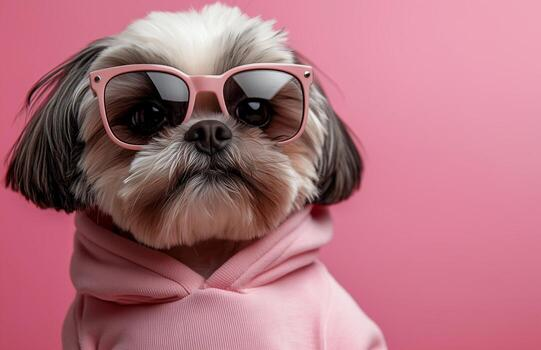

In [1]:
# Load the image
from PIL import Image
img = Image.open("../artifacts/dog_image_example.png")
img

In [2]:
## Transform this image to tensors
import torchvision.transforms as T
import torch
img_tensor = T.PILToTensor()(img).to(torch.float32)

# Normalize this image, before feeding into the MLP
img_tensor_norm = img_tensor / 125.5 - 1.0

In [3]:
img_tensor_norm.flatten()

tensor([ 0.6255,  0.6255,  0.6255,  ..., -0.0757, -0.0757, -0.0757])

In [4]:
x = img_tensor_norm.flatten()
in_features_1 = x.shape[0]
out_features_1 = 128
weight_1 = torch.rand(in_features_1, out_features_1)
bias_1 = torch.randn(out_features_1)
n_classes = 3
print("Before feeding it into the Network")
print(f"x.mean = {x.mean():.4f}")
print(f"x.std = {x.std():.4f}")
y_1 = x @ weight_1 + bias_1

a_1 = torch.tanh(y_1)
weight_2 = torch.rand(out_features_1, n_classes)
bias_2 = torch.rand(n_classes)
y_2 = a_1 @ weight_2 + bias_2

print("MLP Model so far...")
print("x (N)")
print(" → Linear(N → 128)")
print(" → tanh")
print(" → Linear(128 → 3)")
print(" → logits")
print("-" * 100)

print("What we are actually computing?....")
print("x (N)")
print(" → Linear(N → 128); y_1 = x @ weight_1 + bias_1")
print(" → tanh; a_1 = tanh(y_1)")
print(" → Linear(128 → 3); y_2 = a_1 @ weight_2 + bias_2")
print(" → logits; y_2")
print("-" * 100)

print("Let's see the Distribution of Signal at each step....")
print("Before Entering the MLP")
print(f"x.mean = {x.mean():.4f}")
print(f"x.std = {x.std():.4f}")
print("Note: Because the Signals are Normalized and is stable")
print("-" * 100)

print("After getting out of the 1st Linear Layer")
print("y_1 = x @ weight_1 + bias_1")
print(f"y_1.mean = {y_1.mean():.4f}")
print(f"y_1.std = {y_1.std():.4f}")
print("Signal's stastics are changed instantly")
print("-" * 100)

print("After Applying the tanh(); a_1 = tanh(y_1)")
print("> Adding tanh() activation will kill this values and will saturate at -1 and +1")
print(f"a_1.mean() = {a_1.mean():.4f}")
print(f"a_1.std() = {a_1.std():.4f}")
print("Since all values are +ve we got +1 everywhere")
print("-" * 100)

print("After passing from; Linear(128 → 3); y_2 = a_1 @ weight_2 + bias_2")
print(f"y_2.mean() = {y_2.mean():.4f}")
print(f"y_2.std() = {y_2.std():.4f}")
print("-" * 100)

print(f"Final logits: {y_2}")
print("-" * 100)

print("Why the sudden Change in the Distribution of Signals?")
print("> This happened because weight_1, bias_1, weight_2 and bias_2 are not initialized properly")
print("We can use, 1) Xavier initialization 2) He initialization, 3) LayerNorm / BatchNorm")

print("Lets stabilize this a bit....")
print("Solution: Use LayerNorm before passing it to activation function")
print("Initilize all weights and baises with Xavier initialization method")

# Before LayerNorm
# x --> y1 = x @ weight_1 + bias_1 --> a1 = tanh(y1) --> y2 = a1 @ weight_2 + bias_2
# After LayerNorm
# x --> y1 = x @ weight_1 + bias_1 --> y1_norm = LayerNorm(y1) --> a1 = tanh(y1_norm) --> y2 = a1 @ weight_2 + bias_2

# Weight initialization
weight_1 = torch.nn.init.xavier_uniform_(weight_1)
weight_2 = torch.nn.init.xavier_uniform_(weight_2)

# Layer-1
y_1 = x @ weight_1 + bias_1

# Layer Norm
y1_mean = y_1.mean()
y1_var = y_1.var(unbiased=False)
eps = 1e-4
y1_norm = (y_1 - y1_mean) / ((y1_var + eps) ** 0.5)
a_1 = torch.tanh(y1_norm)
# Layer-2
y_2 = a_1 @ weight_2 + bias_2

print()
print("*" * 150)
print()
print("Checking Weather Everything is stabilized or not?")
print("> Changed 1. LayerNorm Added before Activation Fnction 2. Initialized all weights and biases from Xavier initialization method")


print("MLP Model so far...")
print("x (N)")
print(" → Linear(N → 128)")
print(" → LayerNorm()")
print(" → tanh")
print(" → Linear(128 → 3)")
print(" → logits")
print("-" * 100)

print("What we are actually computing?....")
print("x (N)")
print(" → Linear(N → 128); y_1 = x @ weight_1 + bias_1")
print(" → tanh; a_1 = tanh(LayerNorm(y_1))")
print(" → Linear(128 → 3); y_2 = a_1 @ weight_2 + bias_2")
print(" → logits; y_2")
print("-" * 100)

print("Let's see the Distribution of Signal at each step....")
print("Before Entering the MLP")
print(f"x.mean = {x.mean():.4f}")
print(f"x.std = {x.std():.4f}")
print("Note: Because the Signals are Normalized and is stable")
print("-" * 100)

print("After getting out of the 1st Linear Layer")
print("y_1 = x @ weight_1 + bias_1")
print(f"y_1.mean = {y1_norm.mean():.4f}")
print(f"y_1.std = {y1_norm.std():.4f}")
print("Signal's stastics are changed instantly")
print("-" * 100)

print("After Applying the tanh(); a_1 = tanh(LayerNorm(y_1))")
print("> Adding tanh() activation will kill this values and will saturate at -1 and +1")
print(f"a_1.mean() = {a_1.mean():.4f}")
print(f"a_1.std() = {a_1.std():.4f}")
print("-" * 100)

print("After passing from; Linear(128 → 3); y_2 = a_1 @ weight_2 + bias_2")
print(f"y_2.mean() = {y_2.mean():.4f}")
print(f"y_2.std() = {y_2.std():.4f}")
print("-" * 100)

print(f"Final logits: {y_2}")
print("-" * 100)

print("Why there is not a sudden Change in the Distribution of Signals?")
print("> This happened because now I Initialized weight_1, weight_2 properly with Xavier initialization")
print("> Added LayerNorm before activation")

Before feeding it into the Network
x.mean = 0.0987
x.std = 0.5101
MLP Model so far...
x (N)
 → Linear(N → 128)
 → tanh
 → Linear(128 → 3)
 → logits
----------------------------------------------------------------------------------------------------
What we are actually computing?....
x (N)
 → Linear(N → 128); y_1 = x @ weight_1 + bias_1
 → tanh; a_1 = tanh(y_1)
 → Linear(128 → 3); y_2 = a_1 @ weight_2 + bias_2
 → logits; y_2
----------------------------------------------------------------------------------------------------
Let's see the Distribution of Signal at each step....
Before Entering the MLP
x.mean = 0.0987
x.std = 0.5101
Note: Because the Signals are Normalized and is stable
----------------------------------------------------------------------------------------------------
After getting out of the 1st Linear Layer
y_1 = x @ weight_1 + bias_1
y_1.mean = 28040.4492
y_1.std = 108.2884
Signal's stastics are changed instantly
------------------------------------------------------

## Conclusion
1. Linear layers amplify mean and variance
2. Activations assume controlled input scale
3. Saturation = information death
4. Normalization defines where nonlinearities operate
5. Stable networks are about statistics, not magic

Here’s a **clean, self-explanatory rephrasing**, tightened for **personal notes / future reference**, neutral tone, no “you”, no conversational phrasing.

---

## 1. What is *locality*?

### Definition

**Locality** means:

> Elements that are close in space are more strongly related than elements that are far apart.

In images:

* Pixel `(x, y)` is strongly related to `(x+1, y)` and `(x, y+1)`
* It is weakly related to a pixel on the opposite corner of the image

This is **not a modeling assumption** — it is a **physical property of images**.

Edges, textures, and corners arise from **local pixel interactions**, not global ones.

---

## 2. What is a *spatial feature*?

A **spatial feature** is a pattern defined by:

* **relative positions** of pixels
* **local relationships**, not absolute indices

Examples:

* **Edge** → local intensity change between neighboring pixels
* **Corner** → intersection of multiple edges
* **Texture** → repeated local pattern

Key insight:

> A spatial feature exists only because pixels live on a geometric grid `(H × W)`.

Without geometry, spatial features do not exist.

---

## 3. What flattening does (why MLPs break images)

When an image is flattened:

```python
x = img.flatten()
```

The following information is destroyed:

* adjacency
* geometry
* neighborhood structure

After flattening:

* pixel `0` and pixel `150,000` are just two numbers
* spatial distance is meaningless

The model sees:

> a bag of independent values

However, images are **not bags of values** — they are structured spatial signals.

---

## 4. What *inductive bias* means

### Definition

**Inductive bias** refers to assumptions built into a model *before* learning begins.

Examples:

* **CNNs** assume nearby pixels are related
* **RNNs** assume nearby time steps are related
* **Transformers** assume tokens interact via attention

No model is unbiased — every architecture encodes assumptions.

---

## 5. Why MLPs have no inductive bias for vision

An MLP assumes:

* every input dimension is treated independently
* there is no notion of distance or neighborhood
* there is no translation invariance

As a result, to learn even a simple edge, an MLP must:

* rediscover locality
* rediscover translation invariance
* rediscover weight sharing

This is statistically inefficient and computationally impractical.

---

## 6. Why MLPs worked in language modeling (historically)

Language has **inherent structure**.

Properties of language:

* tokens follow a natural sequence
* meaning depends on relative position in time
* interactions are **1D**, not 2D

Early language models used:

* MLPs on fixed-size n-grams
* later, RNNs with explicit sequential inductive bias

Even simple n-gram MLPs preserve locality:

```text
[word_{t-2}, word_{t-1}, word_t]
```

This structure is **not destroyed** by vectorization.

---

## 7. Why this does not transfer to images

Images are fundamentally different:

* 2D (plus channels)
* spatially local
* translation invariant

Flattening an image:

* destroys 2D locality
* removes translation structure
* introduces artificial long-range dependencies

MLPs were never designed to operate on grid-based geometry.

---

## 8. Parameter explosion (practical failure of MLPs)

For a typical image:

```text
224 × 224 × 3 ≈ 150,000 inputs
```

First MLP layer with 128 units:

```text
150,000 × 128 ≈ 19 million parameters
```

CNN alternative:

* small kernels (e.g., 3×3)
* weights shared across spatial locations
* thousands of parameters instead of millions

This difference is **structural**, not an optimization trick.

---

## 9. Unifying perspective

| Domain            | Inherent Structure | Effective Model   |
| ----------------- | ------------------ | ----------------- |
| Tabular           | None               | MLP               |
| Language          | Sequence (1D)      | RNN / Transformer |
| Images            | Grid (2D)          | CNN               |
| Vision + Language | Mixed              | Conv + Attention  |

The issue is **not** that MLPs are weak.

The issue is:

> **MLPs assume no structure, while images are entirely structure.**

---

## 10. Conclusion

> **MLPs rely on structure already being encoded in the input.
> CNNs encode spatial structure directly into the model.**

This distinction explains why convolution is not optional for vision modeling.